#### Assignment: CSE 2203
--------------------------------
##### Submitted by:
Name: Khandoker Sefayet Alam <br>
Roll: 2003121 <br>
Section: C <br>
Date: 17-Jan-2024 <br>
##### Submitted to:
Md. Farukuzzaman Faruk <br>
Assistant Professor, <br> 
Dept. Of CSE, RUET <br>

In [433]:
#import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
import math


In [434]:
#Read from csv file
def read_csv_file(file_path):
    years = []
    populations = []
    
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)  # Get the header row
        
        for row in csvreader:
            if row[0]=='Year Population': 
                continue
            yr=""
            pop=""
            for i in range(0,4):
                yr=yr+row[0][i]
            years.append(int(yr))
            for i in range(5,len(row[0])):
                pop=pop+row[0][i]
            populations.append(int(pop))
    return years, populations

#file_path = 'population_data.csv'
#years, populations = read_csv_file(file_path)
#print(years)
#print(populations)


In [435]:
#Using Newton's Interpolation method, find population for a certain year

def print_fd(forward_diff):
    for index in forward_diff:
        for element in index:
            print(element,end=' ')
        print('\n')
        
def NewtonInterpolation(years, population, target_year):     
    x=years
    y=population
    n=len(years)
    h=years[1]-years[0]
    p=(target_year-years[0])/h
    forward_diff=[]
    forward_diff.append(population)
    
    for i in range(n-1):
        forward_diff.append([])
        for j in range(n-i-1):
            forward_diff[i+1].append(float(forward_diff[i][j+1] - forward_diff[i][j]))
    #print_fd(forward_diff)
    coeff = p
    fact = 1
    prediction=population[0]
    for i in range(1, len(forward_diff)):
        fact *= i
        prediction +=float((p*forward_diff[i][0])/fact) 
        p *= (coeff-i)
       
    return prediction

#years=[2015,2016,2017,2018]
#populations=[100,200,400,800]
#NewtonInterpolation(years,populations,2025)

***Now let's assume a function for population such that f(t)-target_population=0***

In [436]:

def create_func(years,populations):
    coefficients = np.polyfit(years, populations, 2)
    function=np.poly1d(coefficients)
    #print(function)
    #print(derivative)
    return function



***Using Newton-Raphson Method we need to find by which year we'll reach the target population***

In [437]:
def newton_raphson(years,populations,target_population ,tolerance = 1e-6, initial_guess=2000,max_iterations=10000):
    func=create_func(years,populations)
    t_guess = initial_guess
    deriv_func=func.deriv()
    iteration = 0

    # Perform iterations
    while iteration < max_iterations:
        f_t = func(t_guess) - target_population
        f_prime_t = deriv_func(t_guess)
        t_guess = t_guess - f_t / f_prime_t
        if abs(f_t) < tolerance:
            return t_guess
        iteration += 1
    # If the method did not converge, raise an exception or return None
    raise ValueError("Newton's Raphson method did not converge within the specified iterations.")

***Using Curve Fitting method to fit a curve to the population data***


In [438]:
def curve_fitting(years, populations, target_year):      # straight line method
    n = len(years)
    
    sum_pop_sq=0
    sum_yr_sq=0
    sum_years=0
    sum_pop=0
    
    for yr in years:
        sum_years+=yr
        sum_yr_sq+=yr*yr
        
    for pop in populations:
        sum_pop+=pop
        sum_pop_sq+=pop*pop
    
    sum_xy=0
    
    for i in range(0,n):
        sum_xy+=years[i]*populations[i]
        
    a = (n*sum_xy - sum_pop*sum_years) / (n*sum_yr_sq - sum_years**2)
    a1 = (sum_pop - a*sum_years) / n

    ret = a*target_year + a1
    return ret

***Driver function***


In [439]:
file_path = 'population_data.csv'
years, populations = read_csv_file(file_path)
print("\nYears= ")
print(years)
print("\nPopulations= ")
print(populations)
sz=len(years)
last=years[sz-1]
ten_years=[]

for i in range(1,11):
    ten_years.append(last+i)
#print(ten_years)

target_poplation_using_interpolation=[]

target_poplation_for_curve_fit=[]

for yr in ten_years:
    target_poplation_using_interpolation.append(NewtonInterpolation(years,populations,yr))

#print(target_poplation_using_interpolation)

for yr in ten_years:
    target_poplation_for_curve_fit.append(curve_fitting(years,populations,yr))

#print(target_poplation_for_curve_fit)


Years= 
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Populations= 
[129193327, 131670484, 134139826, 136503206, 138789725, 140912590, 142628831, 144135934, 145421318, 146706810, 148391139, 150211005, 152090649, 154030139, 155961299, 157830000, 159784568, 161793964, 163683958, 165516222, 167420951, 169356251, 171186372, 172954319, 174701211]


***Now let's print all the values we got to compare***

In [440]:
print("The values we got using newton interpolation: \n")
for yr,p in  zip(ten_years,target_poplation_using_interpolation):
    print("For the year ",yr,"The population will be : ",p)
    
print("\n\nThe values we got using newton interpolation: \n")
for yr,p in  zip(ten_years,target_poplation_for_curve_fit):
    print("For the year ",yr,"The population will be : ",p)

The values we got using newton interpolation: 

For the year  2025 The population will be :  135780150972.08765
For the year  2026 The population will be :  3297179002029.9453
For the year  2027 The population will be :  41800507941091.0
For the year  2028 The population will be :  367775442138122.75
For the year  2029 The population will be :  2521988270836902.0
For the year  2030 The population will be :  1.4355475578135344e+16
For the year  2031 The population will be :  7.055359970460528e+16
For the year  2032 The population will be :  3.075502652115291e+17
For the year  2033 The population will be :  1.2123850197281577e+18
For the year  2034 The population will be :  4.385788666928464e+18


The values we got using newton interpolation: 

For the year  2025 The population will be :  176520942.17999983
For the year  2026 The population will be :  178360971.27692318
For the year  2027 The population will be :  180201000.37384605
For the year  2028 The population will be :  182041029.

***Now let's check  our Newton Raphson methon to check if the predicted values match with our years***


In [441]:
years_using_newton_raph=[]

for p in target_poplation_for_curve_fit:
    years_using_newton_raph.append(newton_raphson(years,populations,p))

print("Using curve fitting method's values: \n")
for p,ye in zip(target_poplation_for_curve_fit,years_using_newton_raph):
    print("Population will be: ",p," in year : ",ye)


Using curve fitting method's values: 

Population will be:  176520942.17999983  in year :  2025.0229223588537
Population will be:  178360971.27692318  in year :  2026.028223222137
Population will be:  180201000.37384605  in year :  2027.0339203997898
Population will be:  182041029.4707694  in year :  2028.040014360895
Population will be:  183881058.56769228  in year :  2029.046505575457
Population will be:  185721087.66461515  in year :  2030.0533945144127
Population will be:  187561116.7615385  in year :  2031.0606816496281
Population will be:  189401145.85846138  in year :  2032.068367453903
Population will be:  191241174.95538473  in year :  2033.0764524009746
Population will be:  193081204.0523076  in year :  2034.0849369655186


***So, we can conclude that the curve fitting method's predictions are quite accurate as they give accurate years***

***Now we shall see how was the population curve was for 2000-2024....***
***The red line in the below graph shows us the prediction for the next ten years***

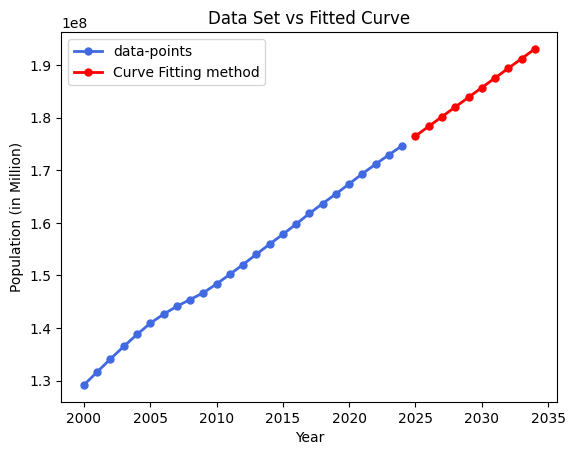

In [442]:
plt.title("Data Set vs Fitted Curve")
plt.xlabel("Year")
plt.ylabel("Population (in Million)")

plt.plot(years, populations, "-o", label="data-points", color="royalblue")
plt.plot(ten_years, target_poplation_for_curve_fit, "-o", label="Curve Fitting method", color="red")



plt.legend()
plt.show()

***Now we shall see how the graph will be for next ten years i.e 2025-2035...***
***We'll see both results for newton interpolation method and curve fitting method...***
***Also we'll keep the main graph for 2000-2024 that'll help us figure out which one is better***

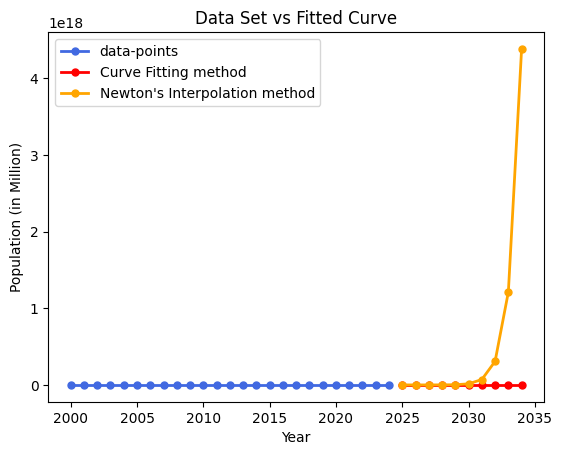

In [443]:
plt.title("Data Set vs Fitted Curve")
plt.xlabel("Year")
plt.ylabel("Population (in Million)")

plt.plot(years, populations, "-o", label="data-points", color="royalblue")
plt.plot(ten_years, target_poplation_for_curve_fit, "-o", label="Curve Fitting method", color="red")
plt.plot(ten_years, target_poplation_using_interpolation, "-o", label="Newton's Interpolation method", color="orange")

plt.legend()
plt.show()

***Therefore, we can conclude that Curve fitting method gives a better result for prediction than Newton's interpolation formula***